## Knight's Tour problem - Bargetto, Iavarone

## introduzione: spiegazione del gioco, storia, abstract di come risolviamo gli algoritmi. 

The problem is to find a sequence of moves of the knight on the chessboard such that the knight visits every square on the board exactly once. We decide to implement only algorithms that solve the problem with open tours, the knight does not end on the same cell it starts. 

## Warnsdroff's solution 1

###   _ _ init _ _ method

The initializer just creates n lists of size n which represent our chessboard. It has only one attribute **n** which is the size of the squared board, so we can solve our problem in different cases. This representation stores the step numbers from 1 to n^2 on the squares of the chessboard which correspond to the order of knight's moves. If one cell has the value n^2 it means that the knight has covered all the sqaures and the problem is solved. So, we decide to set all the initial elements of the lists as zeros in order to keep track of the moves.
The attribute **self.n** and the initialization of the board as empty list are constant. The append operation is constant too and we call it: n^2 times to append zeros in lists (twice a for loop) and n times to append lists to create the board (the first for loop). Hence the total cost is c_1 + n^2c_2 + nc_3, which means **O(n^2)**.



### _ _ str _ _  method

One may want to print the chessboard. The easiest way is to represent it as n orizontal strings of n elements which are the squares. So each printed line created with **join** has a length proportional to n and the cost is **O(n)**.

### find_free_pos method

We use this method to determine a list of free positions on the board in which a knight could go in one step, given the current position. The cost is:
- constant for the initialization of the list **free_pos**
- constant for the for loop, since it does not depend on the size of the board but only on the maximum number 8 of differnt moves which a knight can take from a square; for example given the square **(x,y)** the knight can go into the cells **(x+2,y+1),(x+1,y+2),(x-2,y+1),(x-1,y+2),(x-1,y-2),(x-2,y-1),(x+1,y-2),(x+2,y-1)**


### find_next_pos method 

We want to choose the square from which the knight has the fewest available moves. Indeed, visiting the squares with the fewest available moves first pushes the knight to visit the squares around the edges of the board first. This ensures that the knight will visit the hard-to- reach corners early and can use the middle squares to hop across the board only when necessary. Utilizing this kind of knowledge to speed up an algorithm is called a heuristic, in particular this is called Warnsdorff’s heuristic. 



In [8]:
legal_move_x = [2, 1, -1, -2, -2, -1, 1, 2]
legal_move_y = [1, 2, 2, 1, -1, -2, -2, -1]

class Knight_Tour1:
    
    def __init__(self, n):
        self.n = n      # board size
        self.board = []
        for i in range(0,n):
            s = []
            for j in range(0,n):
                s.append(0)
            self.board.append(s) 
    
    def __str__(self):
        print("Chessboard:")
        kt = []
        for i in range(0,self.n):
            row = self.board[i]
            kt.append(""+str(row)+"\n")
        return "".join(kt)
    
    #####################################
    
    def find_free_pos(self, current_pos):
        free_pos = []
        for i in range (0, 8):
            row = current_pos[0] + legal_move_x[i]
            col = current_pos[1] + legal_move_y[i]
            if 0 < row <= self.n and 0 < col <= self.n and self.board[row-1][col-1] == 0:
                free_pos.append((row,col))
        return free_pos
 

    def find_next_pos(self, current_pos):
        free_pos = self.find_free_pos(current_pos) 
        if len(free_pos) == 0:
            return 
        else: 
            possible_moves = 8
            next_pos = ()
            for pos in free_pos:
                next_free_pos = self.find_free_pos(pos) 
                if 0 < len(next_free_pos) <= possible_moves:
                    possible_moves = len(next_free_pos)
                    next_pos = pos
                elif len(next_free_pos) == 0:
                    next_pos = pos
            return next_pos
    
    
    def warnsdroff_solution(self, start_pos):
        count = 1 
        row = start_pos[0]
        col = start_pos[1]
        self.board[row-1][col-1] = count
        
        while count <= self.n*self.n:
            count += 1
            next_pos = self.find_next_pos((row,col))
            if next_pos:
                row = next_pos[0]
                col = next_pos[1]
                self.board[row-1][col-1] = count
            else:        
                return print(self)
            
    

In [18]:
tour1 = Knight_Tour1(8)

In [19]:
print(tour1)

Chessboard:
[0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]



In [20]:
tour1.warnsdroff_solution((1,1))

Chessboard:
[1, 4, 23, 20, 57, 6, 51, 44]
[22, 19, 2, 5, 50, 43, 58, 7]
[3, 24, 21, 56, 27, 60, 45, 52]
[18, 29, 26, 49, 42, 55, 8, 59]
[25, 14, 35, 28, 61, 48, 53, 46]
[30, 17, 32, 41, 54, 39, 62, 9]
[13, 34, 15, 36, 11, 64, 47, 38]
[16, 31, 12, 33, 40, 37, 10, 63]



#### Warnsdroff's solution 2: implementation with Graphs 

It is possible to try a similar solution to the previous one representing the chessboard as a graph. 
We used the following idea: 
- each square of the board, the tuple of coordinates (x,y), can be represented as a vertex in the graph
- two vertices are connected by an edge if and only if there exists a legal move of the knight from one to the other.

To do so, we used the implementation **AdjSetGraphU** developed in class. 
Also, we decide it was necessary also to import networkx as nx for graphical representation of our idea, the vertices are showen as yellow points linked with their possible next moves. 

In the KnightTourGraph class we have created the method adjacent_pos, in order to determine the sets of possible next positions of a vertex taken as input. In this solution we have used it in the method find_next_pos.

### find_next_pos method

This method takes a vertex (cell of the chessboard) and the solution list as an input and it determines the set of available next position from it, cells in which the knight has not passed yet (elements not in the solution list).
With the same criterion as before, we want to choose the square from which the knight has the fewest available moves.
To do this, the method simply do a difference between the set of all possible next positions (finding with the method adjacent_pos) and the set of cells are already covered (finding in the solution set). 



### solution method 

The solution method 

In [ ]:
class AdjSetGraphU():

    def __init__(self):
        self._vertices = {}
        
    def vertices(self):
        """ returns the vertices of a graph """
        return list(self._vertices.keys())

    def edges(self):
        """ returns the edges of a graph """
        _edges = set()
        for n1 in self._vertices:
            for n2 in self._vertices[n1]:
                _edges.add((n1,n2))
        return _edges
    
    
    def insertVertex(self, v):
        """ add a vertex """
        if v not in self._vertices:
            self._vertices[v] = set()

    def insertEdge(self, edge):
        """ assumes that edge is of type tuple or list
        """
        (v1, v2) = tuple(edge)
        
        self.insertVertex(v1)
        self.insertVertex(v2)
        self._vertices[v1].add(v2)
        self._vertices[v2].add(v1)
        
    def incidentEdges(self, v):
        incident_edges = set()
        if v in self._vertices:
            for v2 in self._vertices[v]:
                incident_edges.add((v, v2))
        return incident_edges
    
    def neighs(self, v):
        if v in self._vertices:
            return self._vertices[v]
        return set()
        
    def areAdjacent(self, v1, v2):
        if v1 not in self._vertices:
            return False
        return v2 in self._vertices[v1]
    
    
    def removeVertex(self, v):
        self._vertices.pop(v, None)
        for n in graph._vertices:
            graph._vertices[n].discard(v)        

    def removeEdge(self, edge):
        (v1, v2) = tuple(edge)
        if v1 in self._vertices:
            self._vertices[v1].discard(v2)
        if v2 in self._vertices:
            self._vertices[v2].discard(v1)
    
    
    def BFS(self, s): 
  
        # Mark all the vertices as not visited 
        visited = {}
        for n in self._vertices:
            visited[n] = False
  
        # Create a queue for BFS 
        queue = [] 
  
        # Mark the source node as visited and enqueue it 
        queue.append(s) 
        visited[s] = True
  
        while queue: 
  
            # Dequeue a vertex from queue and print it 
            s = queue.pop(0) 
            print (s, end = " ") 
  
            # Get all adjacent vertices of the dequeued vertex s. If a adjacent 
            # has not been visited, then mark it visited and enqueue it 
            for i in self.neighs(s): 
                if visited[i] == False: 
                    queue.append(i) 
                    visited[i] = True        
                    
                    
    # A function used by DFS 
    def DFSUtil(self, v, visited): 
  
        # Mark the current node as visited and print it 
        visited[v] = True
        print(v, end = ' ') 
  
        # Recur for all the vertices adjacent to this vertex 
        for i in self.neighs(v): 
            if visited[i] == False: 
                self.DFSUtil(i, visited) 
  

    def DFS(self, s): 
  
        # Mark all the vertices as not visited 
        visited = {}
        for n in self._vertices:
            visited[n] = False 
  
        # Call the recursive helper function to print DFS traversal 
        self.DFSUtil(s, visited)
        

In [108]:
legal_move_x = [2, 1, -1, -2, -2, -1, 1, 2]
legal_move_y = [1, 2, 2, 1, -1, -2, -2, -1]

import networkx as nx

class Knight_Tour_Graph1:
    
    def __init__(self,N):
        self.N = N
        self.states = AdjSetGraphU()
        
        for x in range(1,N+1):
            for y in range(1,N+1):
                self.states.insertVertex((x,y))
        
        for n1 in self.states.vertices():
            for n2 in self.states.vertices():
                i = 0
                while not self.states.areAdjacent(n1,n2) and i<8:
                    if n2[0]-n1[0] == legal_move_x[i] and n2[1]-n1[1] == legal_move_y[i]:
                        self.states.insertEdge((n1,n2))
                    else:
                        i += 1
                        
    def get_states(self):
        return self.states
    
    def show_graph(self):
        graph = nx.Graph()
        graph.add_edges_from(self.get_states().edges())
        color_map = ['#FFD700' for node in graph]
        nx.draw(graph, with_labels = True, node_size=450, node_color=color_map)
        
    
    # return a set of adjacent vertices of v 
    def adjacent_pos(self, v):
        return self.states.neighs(v)
    
    ##############################   
    
    
    def find_next_pos(self, current_pos, sol):
        set_sol = set(sol)
        least_degree = 8
        next_pos = ()
        
        for v in self.adjacent_pos(current_pos).difference(set_sol):
            if 0 < len(self.adjacent_pos(v).difference(set_sol)) <= least_degree:
                least_degree = len(self.adjacent_pos(v).difference(set_sol))
                next_pos = v
            elif len(self.adjacent_pos(v).difference(set_sol)) == 0 and len(set_sol) == (self.N*self.N)-1:
                next_pos = v
        return next_pos    
        
    def solution(self, start_pos):
        current_pos = start_pos
        sol = []
        sol.append(start_pos)
        count = 1
        
        while count <= self.N*self.N:
            count +=1
            next_pos = self.find_next_pos(current_pos, sol)
            if next_pos:
                sol.append(next_pos)
                current_pos = next_pos
            else:
                return sol

            
         
    def show_solution(self, sol):
        graph= nx.Graph()
        for i in range(0,self.N*self.N-1):
            graph.add_edge(sol[i], sol[i+1])
        node_map = ['#FFD700' for node in graph]
        nx.draw(graph, with_labels = True, node_size=450, node_color=node_map)
        
     
        

In [109]:
tour1 = Knight_Tour_Graph1(5) 

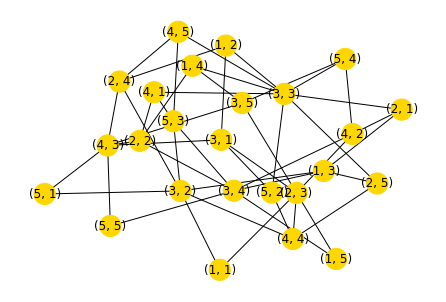

In [110]:
tour1.show_graph() # utile per report, chiedere a stefano come ingrandire immagine 

In [111]:
# solution 1
sol1 = tour1.solution((1,1))

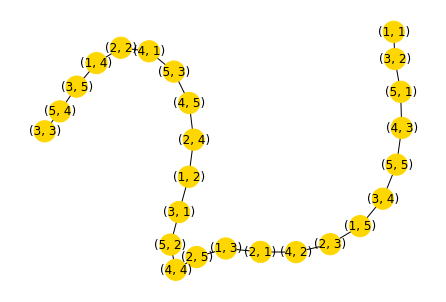

In [116]:
tour1.show_solution(sol1)

In [115]:
len(tour1.solution((1,1)))

25

#### Backtracking solution 1

Backtracking is an algorithmic paradigm that tries different solutions until finds a solution that “works”.
Our approach includes starting from a cell and then choosing a move from all the available moves. Then we check if this move will lead us to the solution or not. If not, we choose a different move. Also, we store all the steps in which we are moving in the chessboard that we created in the constructor. 


### valid_step method

Firstly, we create this method to check if a move to a cell is valid or not. It returns True if the move is inside the chessboard (i.e. the coordinates of the cell are between 1 to n) and if the knight has not passed yet in that cell (i.e. the value of the cell is equal to 0).  


### backtracking method 

This method takes as input the current position of the knight (i.e. the cell where currently the knight is) and the step_count. If it is not specified, the step_count is set equal to None. 
Firstly, we have to check if the solution is found (step_count == n*n), then we will just return True.

Otherwise, we set the next possible knight's move adding the step_count to the solution chessboard and then, recursively, we check if this will lead us to the solution. If not, we set back the cell of the board equal to zero and we select a different move (loop iterates to a different move), thus it is backtracking. If none of the moves are leading us to the solution, then we will return False.



In [21]:
legal_move_x = [2, 1, -1, -2, -2, -1, 1, 2]
legal_move_y = [1, 2, 2, 1, -1, -2, -2, -1]

class Knight_Tour2:
    
    def __init__(self, n):
        self.n = n
        self.board = []
        for i in range(n):
            s = []
            for j in range(n):
                s.append(0)
            self.board.append(s) 
    
    def __str__(self):
        print("Chessboard:")
        kt = []
        for i in range(self.n):
            row = self.board[i]
            kt.append(""+str(row)+"\n")
        return "".join(kt)
    
    ###################################
    
    def valid_step(self, current_pos):
        row = current_pos[0] 
        col = current_pos[1]
        if 0<row<=self.n and 0<col<=self.n:
            if self.board[row-1][col-1]==0:
                return True
        return False
    
    def backtracking(self, current_pos, step_count = None):
        if step_count == None:
            step_count = 2
            
        if step_count == self.n*self.n+1 :
            return True
    
        for i in range(0, 8):
            next_pos_x = current_pos[0]+legal_move_x[i]
            next_pos_y = current_pos[1]+legal_move_y[i]
            if self.valid_step((next_pos_x, next_pos_y)):
                self.board[next_pos_x-1][next_pos_y-1] = step_count
                if self.backtracking((next_pos_x, next_pos_y), step_count+1):
                    return True
                self.board[next_pos_x-1][next_pos_y-1] = 0; # backtracking
        return False
    
    def backtracking_solution(self, start_pos):
        row = start_pos[0]
        col = start_pos[1]
        self.board[row-1][col-1] = 1 
        if self.backtracking(start_pos):
            return print(self)
        return False



In [28]:
tour2 = Knight_Tour2(6)

In [29]:
print(tour2)

Chessboard:
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]



In [30]:
tour2.backtracking_solution((1,1)) 

Chessboard:
[1, 16, 7, 26, 11, 14]
[34, 25, 12, 15, 6, 27]
[17, 2, 33, 8, 13, 10]
[32, 35, 24, 21, 28, 5]
[23, 18, 3, 30, 9, 20]
[36, 31, 22, 19, 4, 29]



#### Backtracking solution 2: implementation with Graphs

In [81]:
legal_move_x = [2, 1, -1, -2, -2, -1, 1, 2]
legal_move_y = [1, 2, 2, 1, -1, -2, -2, -1]

import networkx as nx

class Knight_Tour_Graph2:
    
    def __init__(self,N):
        self.N = N
        self.states = AdjSetGraphU()
        
        for x in range(1,N+1):
            for y in range(1,N+1):
                self.states.insertVertex((x,y))
        
        for n1 in self.states.vertices():
            for n2 in self.states.vertices():
                i = 0
                while not self.states.areAdjacent(n1,n2) and i<8:
                    if n2[0]-n1[0] == legal_move_x[i] and n2[1]-n1[1] == legal_move_y[i]:
                        self.states.insertEdge((n1,n2))
                    else:
                        i += 1
                        
    def get_states(self):
        return self.states
    
    def show_graph(self):
        graph = nx.Graph()
        graph.add_edges_from(self.get_states().edges())
        color_map = ['#FFD700' for node in graph]
        nx.draw(graph, with_labels = True, node_size=450, node_color=color_map)
    
    
    # return a set of adjacent vertices of v 
    def adjacent_pos(self, v):
        return self.states.find_adjacent_vertex(v)
    
    ##############################   

    
    def solution(self, current_pos, sol):
        set_sol = set(sol)
        if len(set_sol) == self.N*self.N:
            return True
        
        for v in self.adjacent_pos(current_pos).difference(set_sol):
            sol.append(v)
            if self.solution(v,sol):
                return True
            sol.pop()   
        
        return False   

    
    def backtracking_solution(self, start_pos):
        sol = []
        sol.append(start_pos)
        if self.solution(start_pos, sol):
            return sol
        return False 
    
    

In [82]:
tour3 = Knight_Tour_Graph2(7) 
# we can't do it with N=8, too long 

In [83]:
tour3.backtracking_solution((1,1))

[(1, 1),
 (2, 3),
 (4, 4),
 (6, 5),
 (7, 7),
 (5, 6),
 (3, 7),
 (1, 6),
 (2, 4),
 (1, 2),
 (3, 1),
 (5, 2),
 (3, 3),
 (2, 1),
 (1, 3),
 (3, 2),
 (5, 3),
 (7, 4),
 (6, 6),
 (4, 5),
 (2, 6),
 (3, 4),
 (1, 5),
 (2, 7),
 (4, 6),
 (2, 5),
 (1, 7),
 (3, 6),
 (5, 7),
 (7, 6),
 (6, 4),
 (7, 2),
 (5, 1),
 (4, 3),
 (6, 2),
 (4, 1),
 (2, 2),
 (1, 4),
 (3, 5),
 (4, 7),
 (5, 5),
 (6, 7),
 (7, 5),
 (5, 4),
 (7, 3),
 (6, 1),
 (4, 2),
 (6, 3),
 (7, 1)]

In [86]:
tour4 = Knight_Tour_Graph2(8)